<class 'pandas.core.frame.DataFrame'>
22194
count is 0 len 229 <class 'str'> PI_257599
count is 1 len 246 <class 'str'> PI_154987
count is 2 len 234 <class 'str'> PI_92270
count is 3 len 238 <class 'str'> PI_152651
count is 4 len 249 <class 'str'> PI_176766
count is 5 len 245 <class 'str'> PI_156330
count is 6 len 269 <class 'str'> PI_329299
count is 7 len 258 <class 'str'> PI_52606
count is 8 len 240 <class 'str'> PI_145633
count is 9 len 235 <class 'str'> PI_273969
count is 10 len 208 <class 'str'> PI_196586
count is 11 len 233 <class 'str'> PI_156463
count is 12 len 255 <class 'str'> PI_22913
count is 13 len 298 <class 'str'> PI_156393
count is 14 len 224 <class 'str'> PI_35038
count is 15 len 242 <class 'str'> PI_152828
count is 16 len 223 <class 'str'> PI_152694
count is 17 len 137 <class 'str'> PI_329310
count is 18 len 236 <class 'str'> PI_251672
count is 19 len 209 <class 'str'> PI_154750
count is 20 len 135 <class 'str'> PI_213900
count is 21 len 136 <class 'str'> PI_152816
co

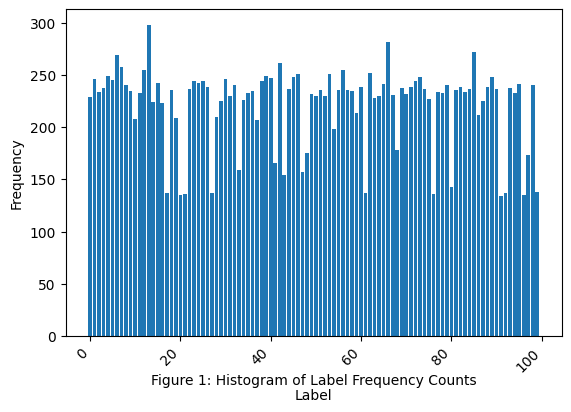

C:\Users\alilo\AppData\Local\Temp\ipykernel_25208\1488774858.py:101: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  table = df.style.hide_index()


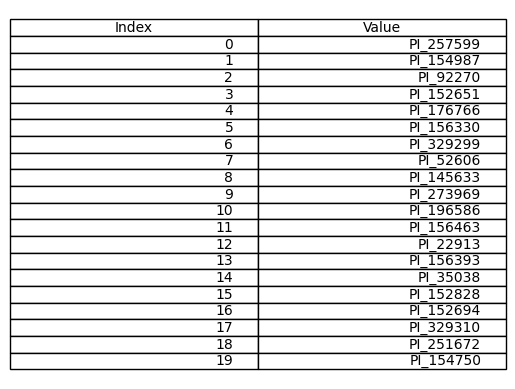

In [8]:
# Code writtne by Ali Lotfi, University of Saskatchewan
#
# 1-This code analyzes the data set from Sorghum 100 found on:
# https://www.kaggle.com/competitions/sorghum-id-fgvc-9/data
# 2- Create a dictionary(dic) of labels, such that dic[label] is a list of image names of the label kind. 
# 3- Create dictionary dic_count such that dic_count[label] is the number of image names of the label kind.
# 4- Draw a histogram of frequency of each label
# 5- Pick a subset of train set
# 6- Pick a subset of test set
#


import pandas as pd
import matplotlib.pyplot as plt
 

# read by default 1st sheet of an excel file
data = pd.read_csv('train_cultivar_mapping.csv')



# sanity check to see the class data is correctly generated
print(type(data))


#size of the test set
print(len(data))


#dic is the dictionary such that dic[key] is the list of all images which are of the kind sorghum key
dic={}
for i in range(22194): 
    if pd.isna(data.loc[i]['cultivar']):
        continue
    if type(data.loc[i]['cultivar'])=='float':
        continue
    if data.loc[i]['cultivar'] in dic:
        dic[data.loc[i]['cultivar']].append(data.loc[i]['image'])
    else:
        dic[data.loc[i]['cultivar']]=[data.loc[i]['image']]

        
count=0 
m=300


for key in dic.keys():
    print('count is',count,'len',len(dic[key]),type(key),key)
    count+=1
    m=min(m,len(dic[key]))


print('class with minimum number of samples has size:',m)
dic_count={}
for key in dic.keys():
    dic_count[key]=len(dic[key])


#####    
label_list=[]
cor_index_label=[]
value_list=[]

corindex=0
for key in dic_count:
    label_list.append(key)
    value_list.append(dic_count[key])
    cor_index_label.append(corindex)
    corindex+=1

####
# In the following we create a table which shows which index corresponds to which Sorghum
my_list = label_list

# In the following we graph the histogram of frequency
# In the following we create a table which shows which index corresponds to which Sorghum
my_list = label_list

# In the following we graph the histogram of frequency
fig, ax = plt.subplots()
ax.bar(cor_index_label, value_list)
# ax.set_title('Label Frequency Counts')
ax.text(0.5, -0.15, 'Figure 1: Histogram of Label Frequency Counts', ha='center', transform=ax.transAxes)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label', labelpad=10) # add a labelpad to adjust the position of the x-axis label
plt.xticks(rotation=45, ha='right') # rotate x-labels by 45 degrees and align them to the right
plt.subplots_adjust(bottom=0.2) # adjust the position of the x-axis labels
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()






# Create a DataFrame with the list values and corresponding indices
df = pd.DataFrame({'Index': range(len(my_list))[0:20], 'Value': my_list[0:20]})


# Create a table
table = df.style.hide_index()

# Create a table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save the table
plt.savefig('table1.jpeg', bbox_inches='tight', pad_inches=0)

# Show the table plot
plt.show()
        


In [19]:
len(dic.keys())
print(m)
# print(dic.keys())
# print(dic['PI_257599'])

134


In [23]:
import os
import random
import shutil

# Pick a subset of train images
# Define the path where the sample images will be saved
sample_dir = 'C:\\Users\\alilo\\OneDrive\\Desktop\\Deep learning\\playwith\\train'

# Define the number of images to sample for each label
num_samples = 20

# Iterate over the labels in the dictionary
for label in dic:
    # Create a directory for the label if it doesn't exist
    label_dir = os.path.join(sample_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # Select a random sample of images for the label
    samples = random.sample(dic[label], num_samples)
    
    for im in samples:
        dic[label].remove(im)

    # Copy the sample images to the label directory
    for filename in samples:
        src = os.path.join('C:\\Users\\alilo\\OneDrive\\Desktop\\Deep learning\\train_images', filename)
        dst = os.path.join(label_dir, filename)
        shutil.copyfile(src, dst)


        
# Pick a subset of test images
# Define the path where the sample images will be saved
sample_dir = 'C:\\Users\\alilo\\OneDrive\\Desktop\\Deep learning\\playwith\\test'

# Define the number of images to sample for each label
num_samples = 4

# Iterate over the labels in the dictionary
for label in dic:
    # Create a directory for the label if it doesn't exist
    label_dir = os.path.join(sample_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # Select a random sample of images for the label
    samples = random.sample(dic[label], num_samples)

    # Copy the sample images to the label directory
    for filename in samples:
        src = os.path.join('C:\\Users\\alilo\\OneDrive\\Desktop\\Deep learning\\train_images', filename)
        dst = os.path.join(label_dir, filename)
        shutil.copyfile(src, dst)

